<h1> Simplest neural Network </h1>
finished  17/2/2023

**Aim:** This is the first draft of the NN, verything will be kept simple.

In [1]:
import myfunctions as mf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
from scipy.optimize import curve_fit
import time
import random

In [2]:
# load data
rootfile = uproot.open("./stage1_clusters_bigdata.root")
event = rootfile["user202302;1"]
xMC = event["x_MC"].array(library="np") #[:40000]
yMC = event["y_MC"].array(library="np") #[:40000]
EMC = event["E_MC"].array(library="np") #[:40000]
x_truth = event["x_truth"].array(library="np") #[:40000]
y_truth = event["y_truth"].array(library="np") #[:40000]
E_truth = event["E_truth"].array(library="np") #[:40000]
x_fit = event["x_fit"].array(library="np") #[:40000]
y_fit = event["y_fit"].array(library="np") #[:40000]
E_fit = event["E_fit"].array(library="np") #[:40000]

In [3]:
clusters5x5, coord, ind_del = mf.form_cluster(xMC, yMC, EMC)
clusters = clusters5x5.reshape((clusters5x5.shape[0], 25))

(718969, 2)
(718969, 5, 5)
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 celles.
Clusters are bigger than 5 c

In [4]:
print(clusters.shape)
print(coord.shape)
print(len(ind_del))
print(len(x_truth))

(718938, 25)
(718938, 2)
31
718969


In [5]:
# delete clusters that are bigger than 5 -> next time: do it in phast user event?
xMC = np.delete(xMC, ind_del, axis=0)
yMC = np.delete(yMC, ind_del, axis=0)
EMC = np.delete(EMC, ind_del, axis=0)
x_truth = np.delete(x_truth, ind_del)
y_truth = np.delete(y_truth, ind_del)
E_truth = np.delete(E_truth, ind_del)
x_fit = np.delete(x_fit, ind_del)
y_fit = np.delete(y_fit, ind_del)
E_fit = np.delete(E_fit, ind_del)

In [6]:
# devide into training and verification 
xMC_train = xMC[:round(len(E_truth)*0.8)]
xMC_veri = xMC[round(len(E_truth)*0.8):]

yMC_train = yMC[:round(len(E_truth)*0.8)]
yMC_veri = yMC[round(len(E_truth)*0.8):]

EMC_train = EMC[:round(len(E_truth)*0.8)]
EMC_veri = EMC[round(len(E_truth)*0.8):]

x_truth_train = x_truth[:round(len(E_truth)*0.8)]
x_truth_veri = x_truth[round(len(E_truth)*0.8):]

y_truth_train = y_truth[:round(len(E_truth)*0.8)]
y_truth_veri = y_truth[round(len(E_truth)*0.8):]

E_truth_train = E_truth[:round(len(E_truth)*0.8)]
E_truth_veri = E_truth[round(len(E_truth)*0.8):]

x_fit_veri = x_fit[round(len(E_truth)*0.8):]
y_fit_veri = y_fit[round(len(E_truth)*0.8):]
E_fit_veri = E_fit[round(len(E_truth)*0.8):]

clusters_t =  clusters[:round(len(E_truth)*0.8)]
clusters_v = clusters[round(len(E_truth)*0.8):]

coord_t = coord[:round(len(E_truth)*0.8)]
coord_v = coord[round(len(E_truth)*0.8):]

Use 'form_cluster' and 'fill_zeros' for making the cluster shapes. Watch out, the zeros are not completely random, the probability is higher that a cluster will be in the center. Should not matter much. I use the lower left corner as a relative coordinate system as the clusters where cut out in differnet places on the ecal (but all should be shashlik cells). No normalization is used.

Prep trainingsdata to match above - I need to apply the relative coordinate system.

In [7]:
training = mf.prep_trainingsdata(x_truth_train, y_truth_train, E_truth_train, coord_t)
print(training.shape) # (575150, 3)

(575150, 3)


<h2> Simple NN </h2>

The network is also kept simple! Use multiples of 32 for the number of neurons and make diamond shape net. Use Dense layers only. As all parameters are positive, relu should work well. No activation function at the end of the net so that the net is continous in the output layer.

In [8]:
load = False
if load==True:
    model1 = keras.models.load_model('stage1model')
    print("Using old model")
    model1.summary()

In [9]:
if load == False:
    model1 = keras.Sequential([layers.Input(shape=(25)),
                             layers.Dense(64, activation="relu"),
                             layers.Dense(128, activation="relu"),
                             layers.Dense(256, activation="relu"),
                             layers.Dense(128, activation="relu"),
                             layers.Dense(64, activation="relu"),
                             layers.Dense(32, activation="relu"),
                             layers.Dense(3, activation=None)])
    model1.summary()
    model1.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.0005))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 9

In [10]:
if load == False:
    fit_hist = model1.fit(clusters_t, training, batch_size=50, epochs=50, validation_split=0.1)

Epoch 1/50
10353/10353 [==============================] - 19s 2ms/step - loss: 18.1180 - val_loss: 4.1400
Epoch 2/50
10353/10353 [==============================] - 18s 2ms/step - loss: 1.5106 - val_loss: 0.3645
Epoch 3/50
10353/10353 [==============================] - 18s 2ms/step - loss: 0.2382 - val_loss: 0.3333
Epoch 4/50
10353/10353 [==============================] - 18s 2ms/step - loss: 0.0366 - val_loss: 0.0136
Epoch 5/50
10353/10353 [==============================] - 18s 2ms/step - loss: 0.0183 - val_loss: 0.0315
Epoch 6/50
10353/10353 [==============================] - 18s 2ms/step - loss: 0.0148 - val_loss: 0.0113
Epoch 7/50
10353/10353 [==============================] - 18s 2ms/step - loss: 0.0119 - val_loss: 0.0078
Epoch 8/50
10353/10353 [==============================] - 18s 2ms/step - loss: 0.0107 - val_loss: 0.0054
Epoch 9/50
10353/10353 [==============================] - 18s 2ms/step - loss: 0.0101 - val_loss: 0.0057
Epoch 10/50
10353/10353 [=============================

Evaluate how good the fitting worked. Plot trainings and validation loss
As a thumb rule: $\newline$
- **Overfitting** if:  training loss << validation loss

- **Underfitting** if:  training loss >> validation loss

- **Just right** if training loss ~ validation loss

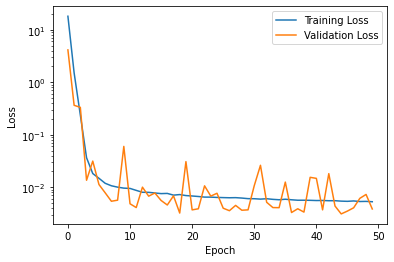

In [11]:
try:
    plt.plot(fit_hist.history['loss'])
    plt.plot(fit_hist.history['val_loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(["Training Loss", "Validation Loss"])
    plt.yscale('log')
    plt.show()
except:
    pass

In [12]:
output = model1.predict(clusters_v)

In [13]:
#keras.models.save_model(model1, 'stage1model')

<h2> Evaluation </h2> 
    
    The distributions should be normal distributions for large data. Therefore a Gaus-function is fitted for all bin where counts > max counts at peak * 30 % as shown with the red graphs. 

In [14]:
veri_truth_data = mf.prep_trainingsdata(x_truth_veri, y_truth_veri, E_truth_veri, coord_v)

In [15]:
veri_fit_data = mf.prep_trainingsdata(x_fit_veri, y_fit_veri, E_fit_veri, coord_v)

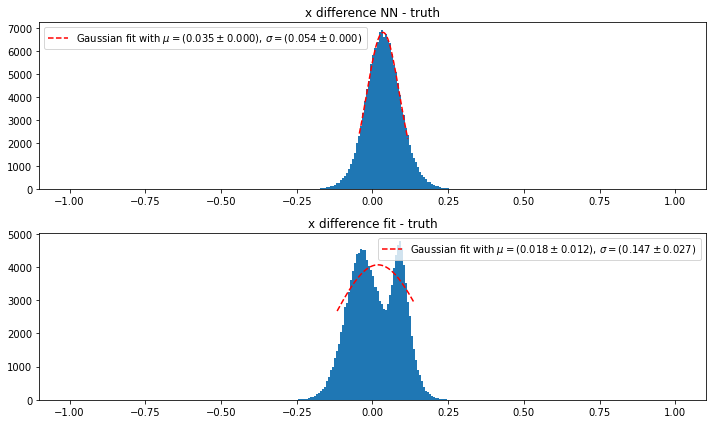

(array([3.48815467e-02, 5.43212221e-02, 9.29398464e+02]),
 array([3.36194559e-04, 4.61193919e-04, 6.30609229e+00]),
 array([1.81492250e-02, 1.47273909e-01, 1.50082021e+03]),
 array([1.16207871e-02, 2.74487217e-02, 2.33705332e+02]))

In [16]:
mf.histo_output(output.T[0], veri_fit_data.T[0], veri_truth_data.T[0], name="x", bins=300)

The lower plot doesn't really look like a gaus... Dominik will soon provide better data

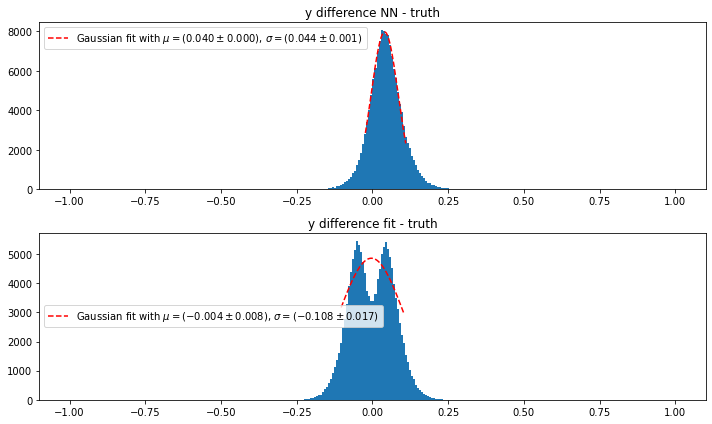

(array([4.03011951e-02, 4.43824699e-02, 8.86143127e+02]),
 array([4.88954419e-04, 6.55011872e-04, 1.04968306e+01]),
 array([-3.59335380e-03, -1.07901939e-01,  1.31559350e+03]),
 array([7.84167892e-03, 1.66460001e-02, 1.64990425e+02]))

In [17]:
mf.histo_output(output.T[1], veri_fit_data.T[1], veri_truth_data.T[1], name="y")

In [24]:
def E_histo(arr_NN, arr_fit, arr_truth, name='', figsave=False, range_x = (-2.5,9), bins=300): 
    plt.rcParams["figure.figsize"] = (10,6)
    plt.subplot(2,1,1)
    n_counts, bins, patches = plt.hist(arr_NN-arr_truth, bins=bins, range=range_x)
    plt.title(name + " difference NN - truth")
    
    plt.subplot(2,1,2)
    n_counts, bins, patches = plt.hist(arr_fit-arr_truth, bins=bins, range=range_x)
    plt.title(name + " difference fit - truth")
    
    plt.tight_layout()
    if figsave == True:
        plt.savefig(name+"_histo.pdf")
    plt.show()

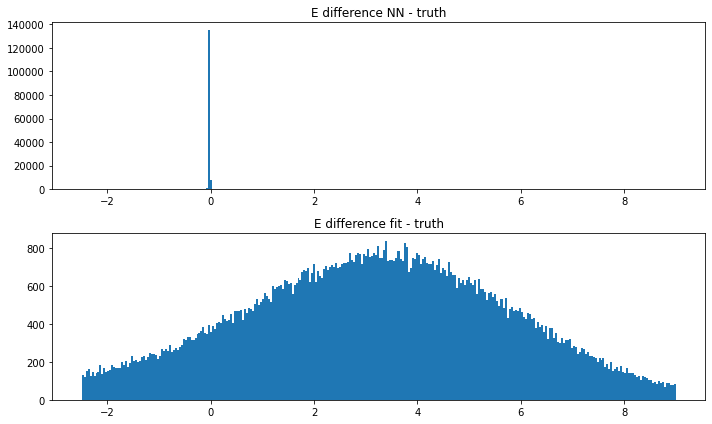

In [25]:
E_histo(output.T[2], veri_fit_data.T[2], veri_truth_data.T[2], name="E")

<h2> Summary </h2>

The NN learns the energy quite well, struggles with the x/y postition to get a lot better than coral. The ratio from trainings loss to validation loss is satisfying although it's quite spiky. How can I make the NN work with more precision?

| (x/y/E) | $\mu$ | $\sigma$ |
| --- | --- | --- |
| simplest model wrong | 0.107 / 0.070 / 0.081 | 0.071 / 0.066 / 0.054 |
| simplest model correct |0.035 / 0.040 / - | 0.054 / 0.044 / -|


**Next step**: normalisation of input/output to gain more precision.